# Data Report
### Income Inequality and Voter-turnout Rate

#### Fiona Wang, Elizabeth He, Jeremy Muhia

## Abstract
Class-divide and wealth inequality in America is at an all-time high and has dramatically increased since the 1970s. Following the most recent Presidential elections, one might wonder whether income and voter turnout can be somehow related.

This project is interested in whether income inequality is correlated with voter-turnout rate in United States from. Intuitively, we want to argue that a greater wage gap is indicative of lower voter turnout rates for reasons including marginalized people feeling disenfranchised and therefore not participating in the election process.

In [3]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas
import seaborn.apionly as sns          # fancy matplotlib graphics (no styling)
from pandas_datareader import wb, data as web  # worldbank data
import quandl
import json

# plotly imports
from plotly.offline import iplot, iplot_mpl  # plotting functions
import plotly.graph_objs as go               # ditto
import plotly                                # just to print version and init notebook
import cufflinks as cf                       # gives us df.iplot that feels like df.plot
cf.set_config_file(offline=True, offline_show_link=False)

# these lines make our graphics show up in the notebook
%matplotlib inline             
plotly.offline.init_notebook_mode(connected=True)

# check versions (overkill, but why not?)
print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Plotly version: ', plotly.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.2 (v3.5.2:4def2a2901a5, Jun 26 2016, 10:47:25) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
Pandas version:  0.19.0
Plotly version:  1.12.11
Today:  2016-12-20


## JSON Helper Function

In [6]:
# the function below translates JSON files into a Python dictionary
def convert_json_file(filename):
    with open(filename, 'r') as full_json_file:
        json_data = json.load(full_json_file)
        full_json_file.close()
        return json_data

In [10]:
# translate the JSON file containing secret API keys and other info into a dictionary for use throughout the program
secrets = convert_json_file('keys.json')

## Get Income Data from Quandl

In [13]:
# this gets the US Income Inequality data form quandl as a dataframe
us_income_ineq = quandl.get('CLIO/USA_II', authtoken=secrets['QUANDL_KEY'])

In [14]:
us_income_ineq

,Value
Year,
1820-12-31,57.007260
1850-12-31,43.797350
1870-12-31,51.340740
1890-12-31,45.523170
1910-12-31,51.090485
1929-12-31,54.274109
1950-12-31,39.424993
1960-12-31,38.023718
1970-12-31,36.064610


In [19]:
# this gets the UK Income Inequality data as a dataframe
uk_income_ineq = quandl.get('CLIO/GBR_II', authtoken=secrets['QUANDL_KEY'])

In [20]:
uk_income_ineq

,Value
Year,
1820-12-31,59.270000
1850-12-31,43.491390
1870-12-31,48.970000
1890-12-31,37.366840
1910-12-31,41.861650
1929-12-31,42.512820
1950-12-31,30.497877
1960-12-31,28.501914
1970-12-31,28.900000


In [15]:
# this gets the Australia Income Inequality data as a dataframe
australia_income_ineq = quandl.get('CLIO/AUS_II', authtoken=secrets['QUANDL_KEY'])

In [16]:
australia_income_ineq

,Value
Year,
1850-12-31,41.307390
1870-12-31,47.545060
1890-12-31,39.354040
1910-12-31,40.727470
1929-12-31,36.270165
1950-12-31,37.933493
1960-12-31,35.016606
1970-12-31,31.818443
1980-12-31,39.336425


In [17]:
# this gets the Canada Income Inequality data as a dataframe
canada_income_ineq = quandl.get('CLIO/CAN_II', authtoken=secrets['QUANDL_KEY'])

In [18]:
canada_income_ineq

,Value
Year,
1820-12-31,45.136050
1850-12-31,26.737010
1870-12-31,43.792240
1890-12-31,41.229970
1910-12-31,40.669061
1929-12-31,41.948842
1950-12-31,36.273740
1960-12-31,34.571472
1970-12-31,33.780417


## Income Share of top 10%

In [71]:
path = '/Users/FIO/Documents/Senior/Data Bootcamp/Final Project/income_inequality.xlsx'
cols = [1] + list(range(13,18)) 

income_share = pd.read_excel(path, parse_cols = cols) # include capital gains
income_share.columns = ['Year',
                        'Top 10%', 
                        'Top 5%',
                        'Top 1%',
                        'Top 0.5%',
                        'Top 0.1%'] # change column label
income_share.dropna(0) # drop any NA
income_share = income_share.tail(46) # select data from 1970 - 2015 only

In [73]:
income_share1 = income_share.set_index(['Year'])

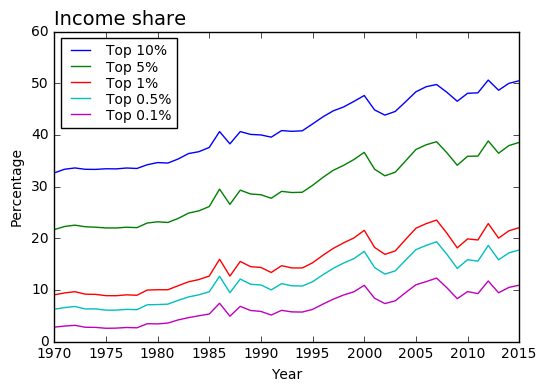

In [74]:
fig, ax = plt.subplots()
income_share1.plot(ax=ax, kind = 'line')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)
ax.set_title('Income share', fontsize = 14, loc = 'left')
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')

From the graph above, we can see that top 10% of the income class almost accounts for 60% of the total income in United States.

## Average Income for Top 10%

In [154]:
path = '/Users/FIO/Documents/Senior/Data Bootcamp/Final Project/income_inequality.xlsx'
cols = [1] + list(range(100,107)) 

average_income = pd.read_excel(path, parse_cols = cols) #include capital gains
average_income.columns = ['Top 10% average income',
                          'Top 5% average income',
                          'Top 1% average income',
                          'Top 0.5% average income',
                          'Top 0.1% average income',
                          'Top 0.01% average income',
                          'Bottom 90% average income']
average_income.dropna(0)
average_income = average_income.tail(46)

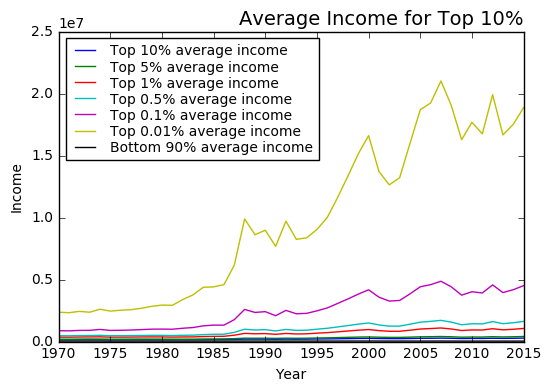

In [167]:
fig, ax = plt.subplots()
average_income.plot(ax=ax, kind = 'line')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)
ax.set_title('Average Income for Top 10%', fontsize = 14, loc = 'right')
ax.set_ylabel('Income')
ax.set_xlabel('Year')

From the graph above, we can see that the average income for top 0.01% has skyrocked since 1970 while the bottom 90% has layed flat.

## Average Income for Bottom 90%

In [161]:
path = '/Users/FIO/Documents/Senior/Data Bootcamp/Final Project/income_inequality.xlsx'
cols = [1] + [106] 

average_income2 = pd.read_excel(path, parse_cols = cols) #include capital gains
average_income2.columns = ['Bottom 90% average income']
average_income2.dropna(0)
average_income2 = average_income2.tail(46)

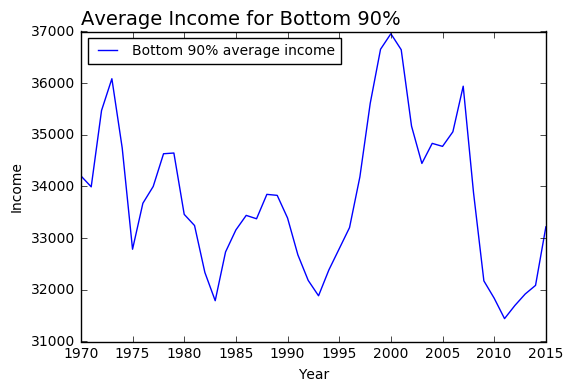

In [165]:
fig, ax = plt.subplots()
average_income2.plot(ax=ax, kind = 'line')
ax.legend(loc='best', fontsize=10, handlelength=2, labelspacing=0.15)
ax.set_title('Average Income for Bottom 90%', fontsize = 14, loc = 'left')
ax.set_ylabel('Income')
ax.set_xlabel('Year')

Average income for the bottom 90% has stayed the same throughout the 45 years and their income in 2015 is even lower than that in 1970.

## Voter Turnout Rate by Levels of Education

In [75]:
path = '/Users/FIO/Documents/Senior/Data Bootcamp/Final Project/CPS Turnout Rates.xlsx'

voter_turnout = pd.read_excel(path, index_col = 0, skiprows = 1)
voter_turnout.dropna(0)
voter_turnout.reset_index(level = 'Turnout Rate')
voter_turnout = voter_turnout.head(4).T
voter_turnout = voter_turnout.sort_index()
voter_turnout = voter_turnout[1:14:2]

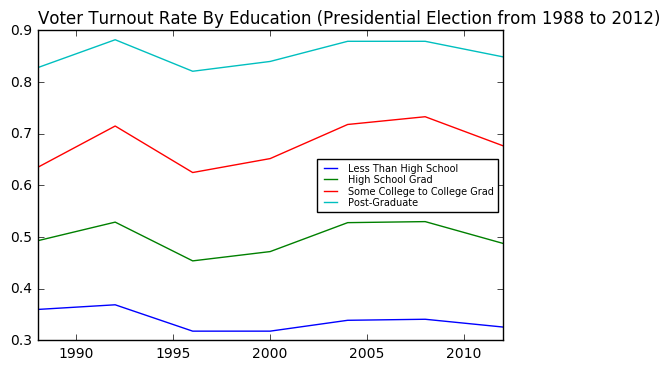

In [23]:
fig, ax = plt.subplots()
voter_turnout.plot(ax=ax, kind = 'line')
ax.legend(loc='best', fontsize=7, handlelength=2, labelspacing=0.15)
ax.set_title('Voter Turnout Rate By Education (Presidential Election from 1988 to 2012)', fontsize = 12, loc = 'left')

## Next Step

We want to then compare the difference between top 10% and bottom 90% and use it as our variable for the level of income inequality.  Then we will regress income inequality on voter-turnout rate by education to see if there is any correlation between the two

## Bibliography/Data Source

* United States Election Project http://www.electproject.org/national-1789-present
* The World Wealth and Income Database http://www.wid.world/#Database: